# LDA Assignment - Gowtam Shanmugam

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
#Import Datasets
from sklearn import datasets
from sklearn.datasets import load_digits
digits=load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

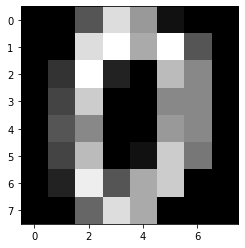

In [38]:
# Plot the digits
plt.imshow(digits.images[0],cmap=plt.cm.gray)

In [39]:
# Coversion of digits data to DataFrame
data1=pd.DataFrame(digits.data)
data1

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [40]:
data1.shape

(1797, 64)

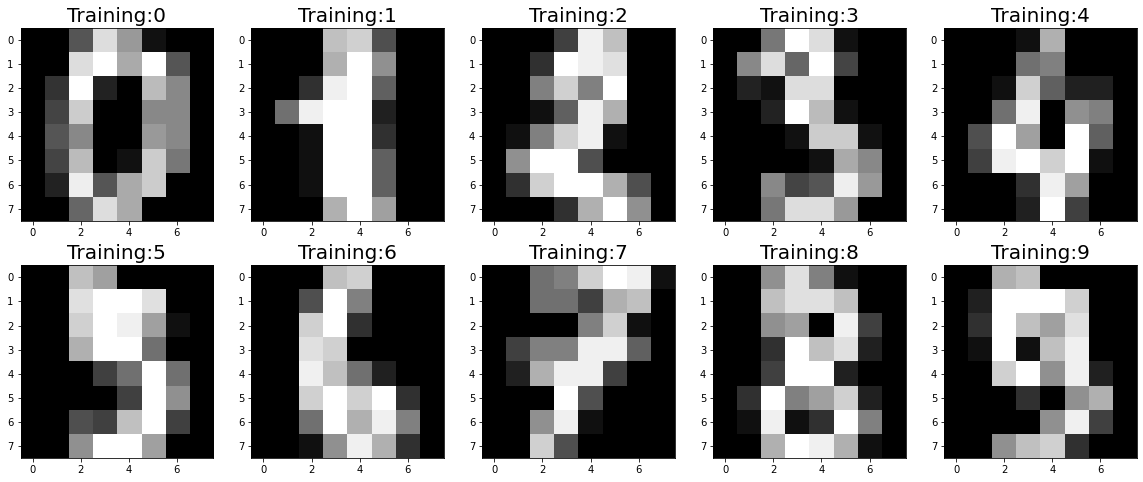

In [41]:
# Display of all images
plt.figure(figsize=(20,8))
for index,(image,label) in enumerate (zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(2,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title(f'Training:{label}',fontsize=20)

In [42]:
x=digits.data
y=digits.target

In [43]:
# Test Train and Split Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
# Perform Scaling using Standard Scaler 
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x_train=SC.fit_transform(x_train) 
x_test=SC.transform(x_test)

In [45]:
x_train.shape

(1437, 64)

In [46]:
x_test.shape

(360, 64)

In [47]:
y_train.shape

(1437,)

In [48]:
y_test.shape

(360,)

In [49]:
# Perform Linear Discriminant Analysis
lda=LinearDiscriminantAnalysis(n_components=9)
x_train=lda.fit_transform(x_train,y_train)
x_test=lda.transform(x_test)

In [50]:
# Building of Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
# y prediction
y_pred=rf.predict(x_test)

In [52]:
# Accuracy
accuracy_score(y_test,y_pred)

0.9555555555555556

In [53]:
confusion_matrix(y_test,y_pred)

array([[31,  0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0, 26,  2,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 31,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 45,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 27,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 38]], dtype=int64)

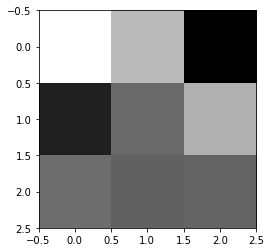

In [54]:
plt.imshow(np.reshape(x_train[0],(3,3)),cmap=plt.cm.gray)

In [55]:
# Decision Tree Classifier with LDA
DTC=DecisionTreeClassifier().fit(x_train,y_train)
predicted=DTC.predict(x_test)
predicted
pd.value_counts(np.array(predicted))

5    51
4    47
3    37
9    35
6    34
7    34
2    31
0    31
8    31
1    29
dtype: int64

In [56]:
accuracy_score(y_test,predicted)

0.9027777777777778

# Q1. What will be the output of the following code?
from sklearn import dataset
digits = datasets.load_digits()
1. Digits data from the sklearn module
2. Import error
3. Value error
4. Digits data in a pandas dataframe

Ans: 2. Import error

In [2]:
from sklearn import dataset 
digits = datasets.load_digits()

ImportError: cannot import name 'dataset' from 'sklearn' (C:\Users\gowta\anaconda3\lib\site-packages\sklearn\__init__.py)

# Q2. If we split the data in a ratio of 80% training and 20% testing data, what will be the correct code for the same?
1. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=42)
2. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=80, random_state=42)
3. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
4. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=80:20, random_state=42)

Ans: 3. X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Q3. In the train_test_split, if we keep the random_state = 1, what does it mean for our training and testing data?
1. Everytime the new random values are generated in the test and train sets
2. The values will be the same every time the code is executed in the testing and training
sets.
3. None of the Above
4. Both 1 and 2.

Ans: 2. The values will be the same every time the code is executed in the testing and training

# Q4. In the code below, where we standardize the data, we have used the fit_transform() for the training sample, and transform() for the testing sample, why?
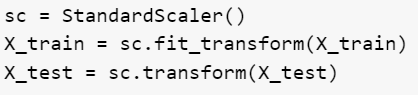
1. We use the same mean and variance calculated on the training data to fit the test data
2. The methods distinguish between the variance of each class
3. The methods distinguish between mean and standard deviation of each class.
4. None of the above

Ans: 1. We use the same mean and variance calculated on the training data to fit the test data

# Q5. Find the mistake in the code below?
lda = LinearDiscriminantAnalysis(n_components=9)

X_train = lda.fit_transform(X_train)

X_test = lda.transform(X_test)

1. Fit_transform() must include the y_train.
2. transform() must include the y_train.
3. None of the above
4. Both 1 and 2

Ans: 1. Fit_transform() must include the y_train.

# Q6. What is the shape of the data after standardizing the training and testing data?
1. (1437,64)
2. (1797,64)
3. (1437,9)
4. (1437,)

Ans: 1. (1437,64)

# Q7. What is the mistake in the code below?
lda = LinearDiscriminantAnalysis(n_components=9)

X_train = lda.fit_transform(X_train, X_test)

X_test = lda.transform(X_test)

1. X_test instead of y_train in fit_transform()
2. X_test instead of y_train in transform()
3. n_components = 9 is incorrect
4. X_test instead of y_test in transform()

Ans: 1. X_test instead of y_train in fit_transform()

# Q8. How do you decide the n_components in the LinearDiscriminantAnalaysis()?
1. Correlation coefficient
2. variation inflation factor
3. explained_variance_ratio
4. None of the above

Ans: 4. None of the above

# Q9. If we keep the n_components as 15 in the LDA, what will be the shape of the data?
1. (1797,15)
2. (15,15)
3. (15,)
4. (1437, 15)

Ans: 4. (1437, 15)

# Q10. After performing LDA on the standardized data, with n_components= 9, Create a random forest classifier to fit the new data with n_estimators= 100, and random_state same as used in train_test_split. After the above operation, what will be the accuracy score of the model?
1. 0.75
2. 0.85
3. 0.95
4. 0.98

Ans: 3. 0.95

# Q11. Identify the mistake in the code below.

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, X_test)

1. X_test instead of y_test
2. X_test instead of y_train
3. X_test instead of n_components = 9
4. Missing parameter - random_state=42

Ans: 2. X_test instead of y_train

# Q12. What percentage of positive cases was the model able to catch for class 6?
1. 100
2. 97
3. 35
4. 99

Ans: 1. 100

Percentage=(34/34)*100=100%

# Q13. What percentage of the predictions were true for class 5?
1. 96
2. 47
3. 98
4. 0.98

Ans: 3. 98

Percentage=(47/48)*100=97.9%

# 14. What percentage of positive predictions were correct for class 3?
1. 34
2. 92
3. 97
4. 94

Ans: 2. 92

Percentage=(33/36)*100=91.66%